In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


**IMPORTING DATASET**

In [2]:
df=pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')

In [3]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
df.tail()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.shape

(20640, 10)

In [7]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

**DATA PREPROCESSING**

In [9]:
numerical_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
                      'population', 'households', 'median_income', 'median_house_value']
categorical_features = ['ocean_proximity']

**Encoding Categorical Data**

In [10]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [11]:
cc=ColumnTransformer(transformers=[('trf1',OneHotEncoder(sparse_output=False,drop='first'),['ocean_proximity'])],remainder='passthrough')

In [12]:
df=cc.fit_transform(df)

**Missing Value Imputation**

In [13]:
si=SimpleImputer(strategy='mean')

In [14]:
df=si.fit_transform(df)

In [15]:
transformed_feature_names = (
    list(cc.named_transformers_['trf1'].get_feature_names_out(categorical_features)) +
    numerical_features
)

In [16]:
df = pd.DataFrame(df, columns=transformed_feature_names)

In [17]:
df.isnull().sum()

ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
dtype: int64

**Outlier Detection and Removal**

In [18]:
import seaborn as sns

<Axes: >

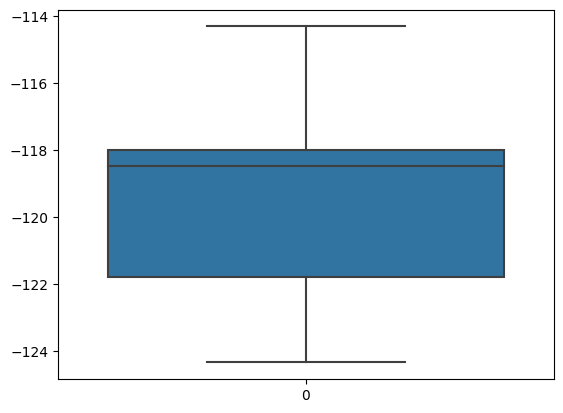

In [19]:
sns.boxplot(df['longitude'])

/tmp/ipykernel_18/3559248941.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['longitude'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='longitude', ylabel='Density'>

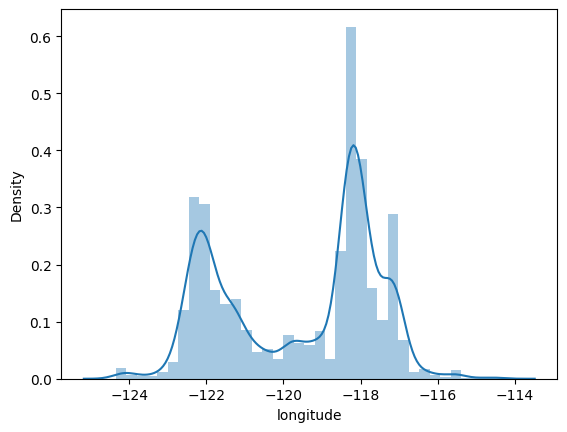

In [20]:
sns.distplot(df['longitude'])

In [21]:
df['longitude'].skew()

-0.2978012079524362

In [22]:
longitude_max=df['longitude'].mean()+3*df['longitude'].std()
longitude_max

-113.55910928685655

In [23]:
longitude_min=df['longitude'].mean()-3*df['longitude'].std()
longitude_min

-125.5802996278721

In [24]:
df[(df['longitude'] > longitude_max) | (df['longitude'] < longitude_min
)]


Empty DataFrame
Columns: [ocean_proximity_INLAND, ocean_proximity_ISLAND, ocean_proximity_NEAR BAY, ocean_proximity_NEAR OCEAN, longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value]
Index: []

/tmp/ipykernel_18/3738931404.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['latitude'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='latitude', ylabel='Density'>

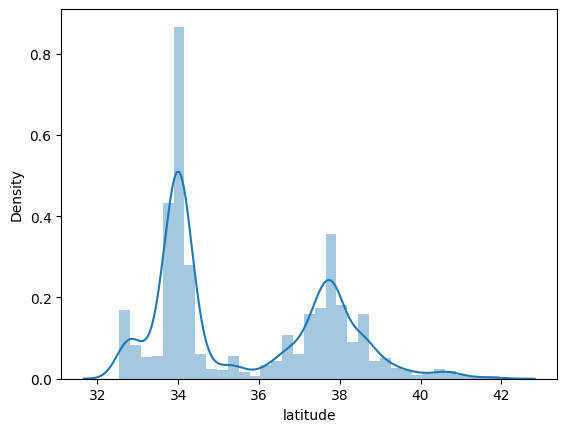

In [25]:
sns.distplot(df['latitude'])

In [26]:
df['latitude'].skew()

0.46595300370997006

In [27]:
latitude_max=df['latitude'].mean()+3*df['latitude'].std()
latitude_max

42.039718626479875

In [28]:
latitude_min=df['latitude'].mean()-3*df['latitude'].std()
latitude_min

29.224004241737184

In [29]:
df[(latitude_max<df['latitude'])|(df['latitude']<latitude_min)]

Empty DataFrame
Columns: [ocean_proximity_INLAND, ocean_proximity_ISLAND, ocean_proximity_NEAR BAY, ocean_proximity_NEAR OCEAN, longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value]
Index: []

In [30]:
df

ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                         0.0                     0.0   
1                         0.0                     0.0   
2                         0.0                     0.0   
3                         0.0                     0.0   
4                         0.0                     0.0   
...                       ...                     ...   
20635                     1.0                     0.0   
20636                     1.0                     0.0   
20637                     1.0                     0.0   
20638                     1.0                     0.0   
20639                     1.0                     0.0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  longitude  \
0                           1.0                         0.0    -122.23   
1                           1.0                         0.0    -122.22   
2                           1.0                         0.0    -122.24   
3                           1.0                         0.0    -122.25   
4                           1.0                         0.0    -122.25   
...                         ...                         ...        ...   
20635                       0.0                         0.0    -121.09   
20636                       0.0                         0.0    -121.21   
20637                       0.0                         0.0    -121.22   
20638                       0.0                         0.0    -121.32   
20639                       0.0                         0.0    -121.24   

       latitude  housing_median_age  total_rooms  total_bedrooms  population  \
0         37.88                41.0        880.0           129.0       322.0   
1         37.86                21.0       7099.0          1106.0      2401.0   
2         37.85                52.0       1467.0           190.0       496.0   
3         37.85                52.0       1274.0           235.0       558.0   
4         37.85                52.0       1627.0           280.0       565.0   
...         ...                 ...          ...             ...         ...   
20635     39.48                25.0       1665.0           374.0       845.0   
20636     39.49                18.0        697.0           150.0       356.0   
20637     39.43                17.0       2254.0           485.0      1007.0   
20638     39.43                18.0       1860.0           409.0       741.0   
20639     39.37                16.0       2785.0           616.0      1387.0   

       households  median_income  median_house_value  
0           126.0         8.3252            452600.0  
1          1138.0         8.3014            358500.0  
2           177.0         7.2574            352100.0  
3           219.0         5.6431            341300.0  
4           259.0         3.8462            342200.0  
...           ...            ...                 ...  
20635       330.0         1.5603             78100.0  
20636       114.0         2.5568             77100.0  
20637       433.0         1.7000             92300.0  
20638       349.0         1.8672             84700.0  
20639       530.0         2.3886             89400.0  

[20640 rows x 13 columns]

/tmp/ipykernel_18/2485343352.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['housing_median_age'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='housing_median_age', ylabel='Density'>

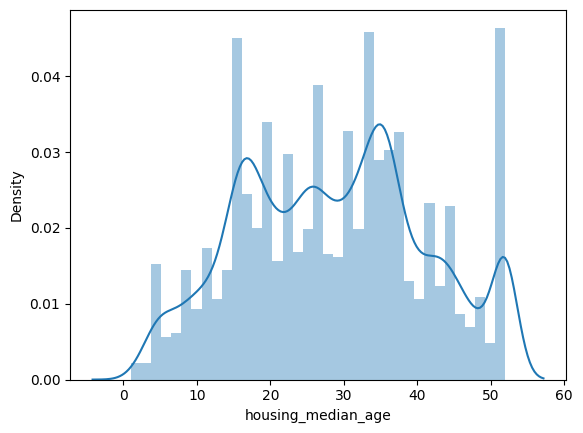

In [31]:
sns.distplot(df['housing_median_age'])

In [32]:
df['housing_median_age'].skew()

0.060330637599136865

In [33]:
housing_median_age_max=df['housing_median_age'].mean()+3*df['housing_median_age'].std()
housing_median_age_max

66.39615927044348

In [34]:
housing_median_age_min=df['housing_median_age'].mean()-3*df['housing_median_age'].std()
housing_median_age_min

-9.117186402226423

In [35]:
df[(housing_median_age_max<df['housing_median_age'])|(df['housing_median_age']<housing_median_age_min)]

Empty DataFrame
Columns: [ocean_proximity_INLAND, ocean_proximity_ISLAND, ocean_proximity_NEAR BAY, ocean_proximity_NEAR OCEAN, longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value]
Index: []

/tmp/ipykernel_18/2490776798.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_rooms'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total_rooms', ylabel='Density'>

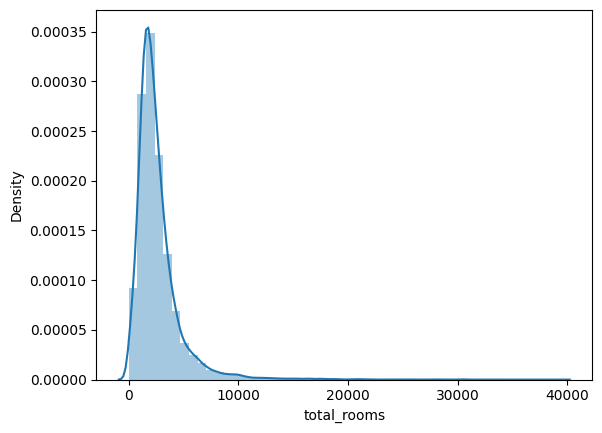

In [36]:
sns.distplot(df['total_rooms'])

In [37]:
df['total_rooms'].skew()

4.147343450632158

In [38]:
seven_five=df['total_rooms'].quantile(0.75)
seven_five

3148.0

In [39]:
two_five=df['total_rooms'].quantile(0.25)
two_five


1447.75

In [40]:
IQR=seven_five-two_five
IQR

1700.25

In [41]:
upper_limit=seven_five+1.5*IQR
lower_limit=two_five-1.5*IQR
upper_limit

5698.375

In [42]:
lower_limit

-1102.625

In [43]:
df[(upper_limit<df['total_rooms'])|(df['total_rooms']<lower_limit)]

ocean_proximity_INLAND  ocean_proximity_ISLAND  \
1                         0.0                     0.0   
101                       0.0                     0.0   
104                       0.0                     0.0   
185                       0.0                     0.0   
283                       0.0                     0.0   
...                       ...                     ...   
20543                     1.0                     0.0   
20544                     1.0                     0.0   
20563                     1.0                     0.0   
20567                     1.0                     0.0   
20629                     1.0                     0.0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  longitude  \
1                           1.0                         0.0    -122.22   
101                         1.0                         0.0    -122.25   
104                         1.0                         0.0    -122.26   
185                         1.0                         0.0    -122.23   
283                         1.0                         0.0    -122.16   
...                         ...                         ...        ...   
20543                       0.0                         0.0    -121.74   
20544                       0.0                         0.0    -121.76   
20563                       0.0                         0.0    -121.75   
20567                       0.0                         0.0    -121.79   
20629                       0.0                         0.0    -121.39   

       latitude  housing_median_age  total_rooms  total_bedrooms  population  \
1         37.86                21.0       7099.0          1106.0      2401.0   
101       37.81                28.0       5806.0          1603.0      2563.0   
104       37.81                34.0       5871.0          1914.0      2689.0   
185       37.79                43.0       5963.0          1344.0      4367.0   
283       37.79                22.0      12842.0          2048.0      4985.0   
...         ...                 ...          ...             ...         ...   
20543     38.55                33.0       6861.0          1820.0      3717.0   
20544     38.55                23.0       8800.0          1857.0      6330.0   
20563     38.67                 9.0      12139.0          2640.0      6837.0   
20567     38.66                15.0       6809.0          1052.0      3060.0   
20629     39.12                28.0      10035.0          1856.0      6912.0   

       households  median_income  median_house_value  
1          1138.0         8.3014            358500.0  
101        1497.0         3.2177            273400.0  
104        1789.0         2.8406            335700.0  
185        1231.0         2.1917            112800.0  
283        1967.0         5.9849            371000.0  
...           ...            ...                 ...  
20543      1767.0         1.7311            182600.0  
20544      1832.0         2.0650            219400.0  
20563      2358.0         3.1250            132500.0  
20567      1060.0         5.3064            165000.0  
20629      1818.0         2.0943            108300.0  

[1287 rows x 13 columns]

In [44]:
df['total_rooms']=np.where(upper_limit<df['total_rooms'],upper_limit,np.where(df['total_rooms']<lower_limit,lower_limit,df['total_rooms']))
df['total_rooms']

0         880.000
1        5698.375
2        1467.000
3        1274.000
4        1627.000
           ...   
20635    1665.000
20636     697.000
20637    2254.000
20638    1860.000
20639    2785.000
Name: total_rooms, Length: 20640, dtype: float64

/tmp/ipykernel_18/1535623934.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_bedrooms'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total_bedrooms', ylabel='Density'>

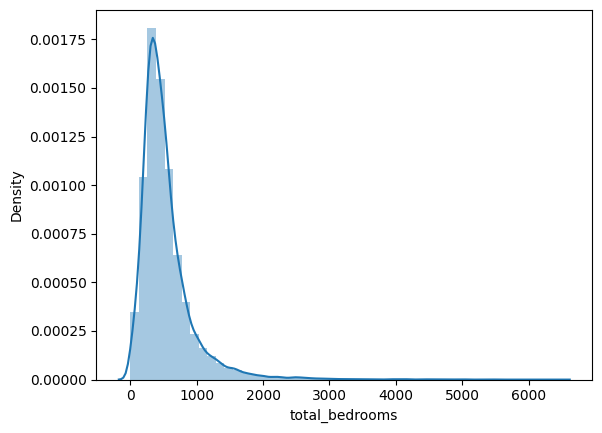

In [45]:
sns.distplot(df['total_bedrooms'])

In [46]:
df['total_bedrooms'].skew()

3.4770233756335105

In [47]:
seven_five=df['total_bedrooms'].quantile(0.75)
seven_five

643.25

In [48]:
two_five=df['total_bedrooms'].quantile(0.25)
two_five


297.0

In [49]:
IQR=seven_five-two_five
IQR

346.25

In [50]:
upper_limit=seven_five+1.5*IQR
lower_limit=two_five-1.5*IQR
upper_limit

1162.625

In [51]:
lower_limit

-222.375

In [52]:
df[(upper_limit<df['total_bedrooms'])|(df['total_bedrooms']<lower_limit)]

ocean_proximity_INLAND  ocean_proximity_ISLAND  \
95                        0.0                     0.0   
96                        0.0                     0.0   
98                        0.0                     0.0   
100                       0.0                     0.0   
101                       0.0                     0.0   
...                       ...                     ...   
20539                     1.0                     0.0   
20543                     1.0                     0.0   
20544                     1.0                     0.0   
20563                     1.0                     0.0   
20629                     1.0                     0.0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  longitude  \
95                          1.0                         0.0    -122.26   
96                          1.0                         0.0    -122.26   
98                          1.0                         0.0    -122.26   
100                         1.0                         0.0    -122.25   
101                         1.0                         0.0    -122.25   
...                         ...                         ...        ...   
20539                       0.0                         0.0    -121.71   
20543                       0.0                         0.0    -121.74   
20544                       0.0                         0.0    -121.76   
20563                       0.0                         0.0    -121.75   
20629                       0.0                         0.0    -121.39   

       latitude  housing_median_age  total_rooms  total_bedrooms  population  \
95        37.80                36.0     5329.000          2477.0      3469.0   
96        37.82                31.0     4596.000          1331.0      2048.0   
98        37.82                22.0     3682.000          1270.0      2024.0   
100       37.81                29.0     4656.000          1414.0      2304.0   
101       37.81                28.0     5698.375          1603.0      2563.0   
...         ...                 ...          ...             ...         ...   
20539     38.56                20.0     5698.375          1516.0      4071.0   
20543     38.55                33.0     5698.375          1820.0      3717.0   
20544     38.55                23.0     5698.375          1857.0      6330.0   
20563     38.67                 9.0     5698.375          2640.0      6837.0   
20629     39.12                28.0     5698.375          1856.0      6912.0   

       households  median_income  median_house_value  
95         2323.0         2.0096            130000.0  
96         1180.0         2.8345            183800.0  
98         1250.0         1.2185            170000.0  
100        1250.0         2.4912            257800.0  
101        1497.0         3.2177            273400.0  
...           ...            ...                 ...  
20539      1466.0         4.2198            164100.0  
20543      1767.0         1.7311            182600.0  
20544      1832.0         2.0650            219400.0  
20563      2358.0         3.1250            132500.0  
20629      1818.0         2.0943            108300.0  

[1306 rows x 13 columns]

In [53]:
df['total_bedrooms']=np.where(upper_limit<df['total_bedrooms'],upper_limit,np.where(df['total_bedrooms']<lower_limit,lower_limit,df['total_bedrooms']))
df['total_bedrooms']

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

/tmp/ipykernel_18/1114946792.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['population'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='population', ylabel='Density'>

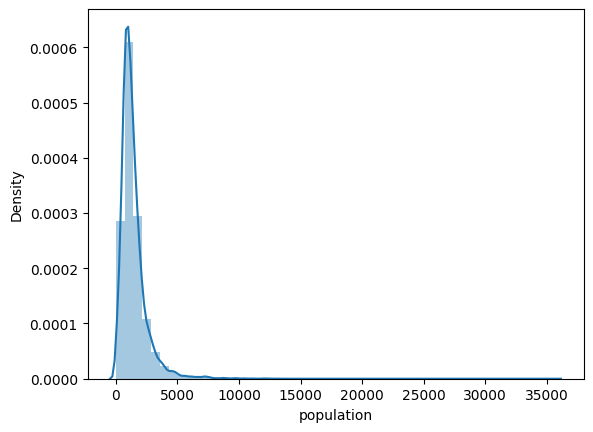

In [54]:
sns.distplot(df['population'])

In [55]:
df['population'].skew()

4.93585822672712

In [56]:
seven_five=df['population'].quantile(0.75)
seven_five

1725.0

In [57]:
two_five=df['population'].quantile(0.25)
two_five


787.0

In [58]:
IQR=seven_five-two_five
IQR

938.0

In [59]:
upper_limit=seven_five+1.5*IQR
lower_limit=two_five-1.5*IQR
upper_limit

3132.0

In [60]:
lower_limit

-620.0

In [61]:
df[(upper_limit<df['population'])|(df['population']<lower_limit)]

ocean_proximity_INLAND  ocean_proximity_ISLAND  \
95                        0.0                     0.0   
185                       0.0                     0.0   
283                       0.0                     0.0   
460                       0.0                     0.0   
485                       0.0                     0.0   
...                       ...                     ...   
20543                     1.0                     0.0   
20544                     1.0                     0.0   
20563                     1.0                     0.0   
20604                     1.0                     0.0   
20629                     1.0                     0.0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  longitude  \
95                          1.0                         0.0    -122.26   
185                         1.0                         0.0    -122.23   
283                         1.0                         0.0    -122.16   
460                         1.0                         0.0    -122.26   
485                         1.0                         0.0    -122.26   
...                         ...                         ...        ...   
20543                       0.0                         0.0    -121.74   
20544                       0.0                         0.0    -121.76   
20563                       0.0                         0.0    -121.75   
20604                       0.0                         0.0    -121.54   
20629                       0.0                         0.0    -121.39   

       latitude  housing_median_age  total_rooms  total_bedrooms  population  \
95        37.80                36.0     5329.000        1162.625      3469.0   
185       37.79                43.0     5698.375        1162.625      4367.0   
283       37.79                22.0     5698.375        1162.625      4985.0   
460       37.87                52.0     1087.000         371.000      3337.0   
485       37.86                35.0     5161.000        1162.625      3276.0   
...         ...                 ...          ...             ...         ...   
20543     38.55                33.0     5698.375        1162.625      3717.0   
20544     38.55                23.0     5698.375        1162.625      6330.0   
20563     38.67                 9.0     5698.375        1162.625      6837.0   
20604     39.12                17.0     4251.000         899.000      3265.0   
20629     39.12                28.0     5698.375        1162.625      6912.0   

       households  median_income  median_house_value  
95         2323.0         2.0096            130000.0  
185        1231.0         2.1917            112800.0  
283        1967.0         5.9849            371000.0  
460         350.0         1.4012            175000.0  
485        1742.0         1.6307            253600.0  
...           ...            ...                 ...  
20543      1767.0         1.7311            182600.0  
20544      1832.0         2.0650            219400.0  
20563      2358.0         3.1250            132500.0  
20604       934.0         2.3496             65000.0  
20629      1818.0         2.0943            108300.0  

[1196 rows x 13 columns]

In [62]:
df['population']=np.where(upper_limit<df['population'],upper_limit,np.where(df['population']<lower_limit,lower_limit,df['population']))
df['population']

0         322.0
1        2401.0
2         496.0
3         558.0
4         565.0
          ...  
20635     845.0
20636     356.0
20637    1007.0
20638     741.0
20639    1387.0
Name: population, Length: 20640, dtype: float64

/tmp/ipykernel_18/2582482094.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['households'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='households', ylabel='Density'>

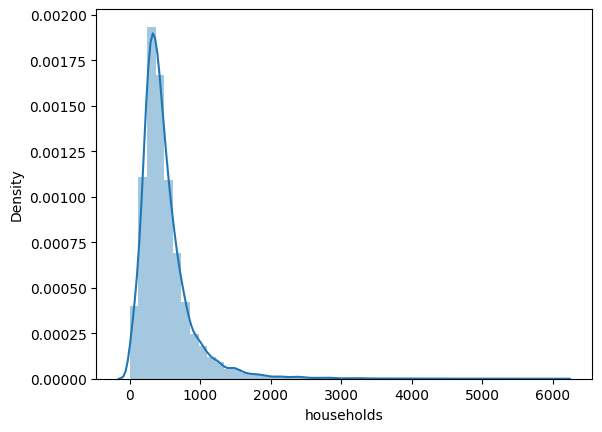

In [63]:
sns.distplot(df['households'])

In [64]:
df['households'].skew()

3.410437711667147

In [65]:
seven_five=df['households'].quantile(0.75)
seven_five

605.0

In [66]:
two_five=df['households'].quantile(0.25)
two_five


280.0

In [67]:
IQR=seven_five-two_five
IQR

325.0

In [68]:
upper_limit=seven_five+1.5*IQR
lower_limit=two_five-1.5*IQR
upper_limit

1092.5

In [69]:
df[(upper_limit<df['households'])|(df['households']<lower_limit)]

ocean_proximity_INLAND  ocean_proximity_ISLAND  \
1                         0.0                     0.0   
95                        0.0                     0.0   
96                        0.0                     0.0   
98                        0.0                     0.0   
100                       0.0                     0.0   
...                       ...                     ...   
20541                     1.0                     0.0   
20543                     1.0                     0.0   
20544                     1.0                     0.0   
20563                     1.0                     0.0   
20629                     1.0                     0.0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  longitude  \
1                           1.0                         0.0    -122.22   
95                          1.0                         0.0    -122.26   
96                          1.0                         0.0    -122.26   
98                          1.0                         0.0    -122.26   
100                         1.0                         0.0    -122.25   
...                         ...                         ...        ...   
20541                       0.0                         0.0    -121.70   
20543                       0.0                         0.0    -121.74   
20544                       0.0                         0.0    -121.76   
20563                       0.0                         0.0    -121.75   
20629                       0.0                         0.0    -121.39   

       latitude  housing_median_age  total_rooms  total_bedrooms  population  \
1         37.86                21.0     5698.375        1106.000      2401.0   
95        37.80                36.0     5329.000        1162.625      3132.0   
96        37.82                31.0     4596.000        1162.625      2048.0   
98        37.82                22.0     3682.000        1162.625      2024.0   
100       37.81                29.0     4656.000        1162.625      2304.0   
...         ...                 ...          ...             ...         ...   
20541     38.54                13.0     5698.375        1158.000      2828.0   
20543     38.55                33.0     5698.375        1162.625      3132.0   
20544     38.55                23.0     5698.375        1162.625      3132.0   
20563     38.67                 9.0     5698.375        1162.625      3132.0   
20629     39.12                28.0     5698.375        1162.625      3132.0   

       households  median_income  median_house_value  
1          1138.0         8.3014            358500.0  
95         2323.0         2.0096            130000.0  
96         1180.0         2.8345            183800.0  
98         1250.0         1.2185            170000.0  
100        1250.0         2.4912            257800.0  
...           ...            ...                 ...  
20541      1115.0         4.6225            226500.0  
20543      1767.0         1.7311            182600.0  
20544      1832.0         2.0650            219400.0  
20563      2358.0         3.1250            132500.0  
20629      1818.0         2.0943            108300.0  

[1220 rows x 13 columns]

In [70]:
df['households']=np.where(upper_limit<df['households'],upper_limit,np.where(df['households']<lower_limit,lower_limit,df['households']))
df['households']

0         126.0
1        1092.5
2         177.0
3         219.0
4         259.0
          ...  
20635     330.0
20636     114.0
20637     433.0
20638     349.0
20639     530.0
Name: households, Length: 20640, dtype: float64

/tmp/ipykernel_18/3001805932.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['median_income'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='median_income', ylabel='Density'>

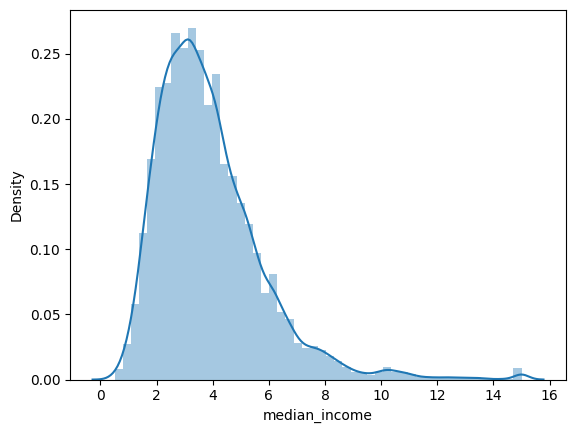

In [71]:
sns.distplot(df['median_income'])

In [72]:
df['median_income'].skew()

1.6466567021344465

In [73]:
seven_five=df['median_income'].quantile(0.75)
seven_five

4.74325

In [74]:
two_five=df['median_income'].quantile(0.25)
two_five


2.5633999999999997

In [75]:
IQR=seven_five-two_five
IQR

2.17985

In [76]:
upper_limit=seven_five+1.5*IQR
lower_limit=two_five-1.5*IQR
upper_limit

8.013024999999999

In [77]:
df[(upper_limit<df['median_income'])|(df['median_income']<lower_limit)]

ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                         0.0                     0.0   
1                         0.0                     0.0   
131                       0.0                     0.0   
134                       0.0                     0.0   
135                       0.0                     0.0   
...                       ...                     ...   
20426                     0.0                     0.0   
20427                     0.0                     0.0   
20428                     0.0                     0.0   
20436                     0.0                     0.0   
20503                     0.0                     0.0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  longitude  \
0                           1.0                         0.0    -122.23   
1                           1.0                         0.0    -122.22   
131                         1.0                         0.0    -122.19   
134                         1.0                         0.0    -122.19   
135                         1.0                         0.0    -122.20   
...                         ...                         ...        ...   
20426                       0.0                         0.0    -118.69   
20427                       0.0                         0.0    -118.80   
20428                       0.0                         0.0    -118.83   
20436                       0.0                         0.0    -118.69   
20503                       0.0                         0.0    -118.75   

       latitude  housing_median_age  total_rooms  total_bedrooms  population  \
0         37.88                41.0      880.000         129.000       322.0   
1         37.86                21.0     5698.375        1106.000      2401.0   
131       37.84                18.0     1617.000         210.000       533.0   
134       37.83                28.0     1326.000         184.000       463.0   
135       37.83                26.0     1589.000         223.000       542.0   
...         ...                 ...          ...             ...         ...   
20426     34.18                11.0     1177.000         138.000       415.0   
20427     34.19                 4.0     5698.375        1162.625      3132.0   
20428     34.23                 6.0     5698.375        1114.000      3132.0   
20436     34.21                10.0     3663.000         409.000      1179.0   
20503     34.33                27.0      534.000          85.000       243.0   

       households  median_income  median_house_value  
0           126.0         8.3252            452600.0  
1          1092.5         8.3014            358500.0  
131         194.0        11.6017            392600.0  
134         190.0         8.2049            335200.0  
135         211.0         8.4010            351200.0  
...           ...            ...                 ...  
20426       119.0        10.0472            500001.0  
20427      1092.5         8.6499            500001.0  
20428      1010.0         8.7288            425800.0  
20436       371.0        12.5420            500001.0  
20503        77.0         8.2787            330000.0  

[681 rows x 13 columns]

In [78]:
df['median_income']=np.where(upper_limit<df['median_income'],upper_limit,np.where(df['median_income']<lower_limit,lower_limit,df['median_income']))
df['median_income']

0        8.013025
1        8.013025
2        7.257400
3        5.643100
4        3.846200
           ...   
20635    1.560300
20636    2.556800
20637    1.700000
20638    1.867200
20639    2.388600
Name: median_income, Length: 20640, dtype: float64

/tmp/ipykernel_18/1643815737.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['median_house_value'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='median_house_value', ylabel='Density'>

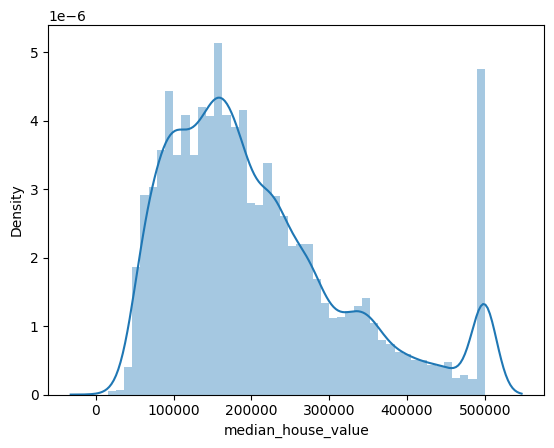

In [79]:
sns.distplot(df['median_house_value'])

In [80]:
df['median_house_value'].skew()

0.9777632739098341

In [81]:
seven_five=df['median_house_value'].quantile(0.75)
seven_five

264725.0

In [82]:
two_five=df['median_house_value'].quantile(0.25)
two_five


119600.0

In [83]:
IQR=seven_five-two_five
IQR

145125.0

In [84]:
upper_limit=seven_five+1.5*IQR
lower_limit=two_five-1.5*IQR
upper_limit

482412.5

In [85]:
lower_limit

-98087.5

In [86]:
df[(upper_limit<df['median_house_value'])|(df['median_house_value']<lower_limit)]

ocean_proximity_INLAND  ocean_proximity_ISLAND  \
89                        0.0                     0.0   
140                       0.0                     0.0   
459                       0.0                     0.0   
489                       0.0                     0.0   
493                       0.0                     0.0   
...                       ...                     ...   
20422                     0.0                     0.0   
20426                     0.0                     0.0   
20427                     0.0                     0.0   
20436                     0.0                     0.0   
20443                     0.0                     0.0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  longitude  \
89                          1.0                         0.0    -122.27   
140                         1.0                         0.0    -122.18   
459                         1.0                         0.0    -122.25   
489                         1.0                         0.0    -122.25   
493                         1.0                         0.0    -122.24   
...                         ...                         ...        ...   
20422                       0.0                         0.0    -118.90   
20426                       0.0                         0.0    -118.69   
20427                       0.0                         0.0    -118.80   
20436                       0.0                         0.0    -118.69   
20443                       0.0                         0.0    -118.85   

       latitude  housing_median_age  total_rooms  total_bedrooms  population  \
89        37.80                52.0      249.000          78.000       396.0   
140       37.81                30.0      292.000          38.000       126.0   
459       37.87                52.0      609.000         236.000      1349.0   
489       37.86                48.0     2153.000         517.000      1656.0   
493       37.86                52.0     1668.000         225.000       517.0   
...         ...                 ...          ...             ...         ...   
20422     34.14                35.0     1503.000         263.000       576.0   
20426     34.18                11.0     1177.000         138.000       415.0   
20427     34.19                 4.0     5698.375        1162.625      3132.0   
20436     34.21                10.0     3663.000         409.000      1179.0   
20443     34.27                50.0      187.000          33.000       130.0   

       households  median_income  median_house_value  
89           85.0       1.243400            500001.0  
140          52.0       6.362400            483300.0  
459         250.0       1.169600            500001.0  
489         459.0       3.041700            489600.0  
493         214.0       7.852100            500001.0  
...           ...            ...                 ...  
20422       216.0       5.145700            500001.0  
20426       119.0       8.013025            500001.0  
20427      1092.5       8.013025            500001.0  
20436       371.0       8.013025            500001.0  
20443        35.0       3.343800            500001.0  

[1071 rows x 13 columns]

In [87]:
df['median_house_value']=np.where(upper_limit<df['median_house_value'],upper_limit,np.where(df['median_house_value']<lower_limit,lower_limit,df['median_house_value']))
df['median_house_value']

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

**EXPLORATORY DATA ANALYSIS(EDA)**


<Axes: xlabel='longitude', ylabel='latitude'>

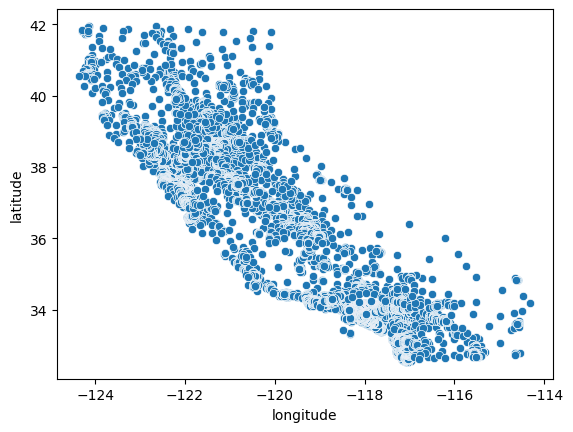

In [88]:
sns.scatterplot(x=df['longitude'],y=df['latitude'])

<Axes: xlabel='total_rooms', ylabel='total_bedrooms'>

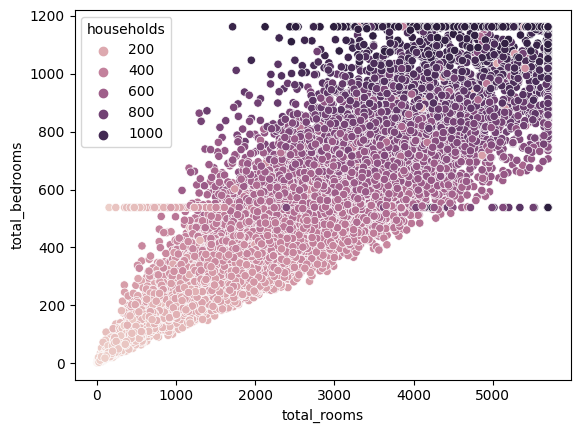

In [89]:
sns.scatterplot(x=df['total_rooms'],y=df['total_bedrooms'],hue=df['households'])

<Axes: xlabel='median_income', ylabel='median_house_value'>

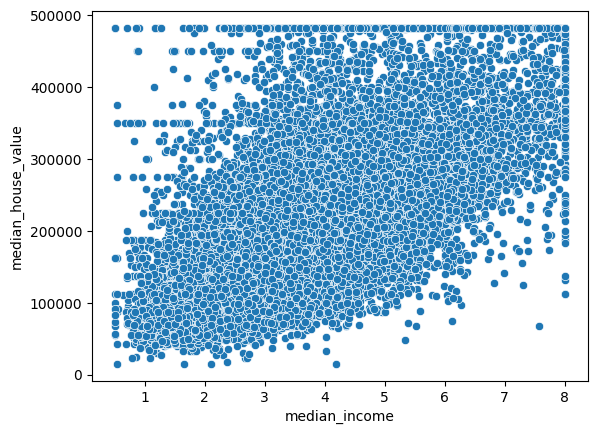

In [90]:
sns.scatterplot(x=df['median_income'],y=df['median_house_value'])

<Axes: xlabel='population', ylabel='households'>

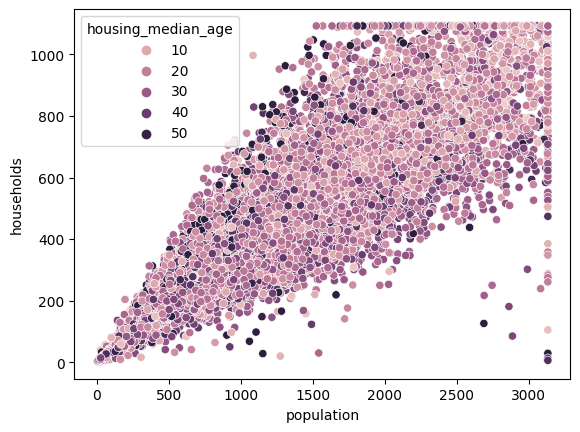

In [91]:
sns.scatterplot(x=df['population'],y=df['households'],hue=df['housing_median_age'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

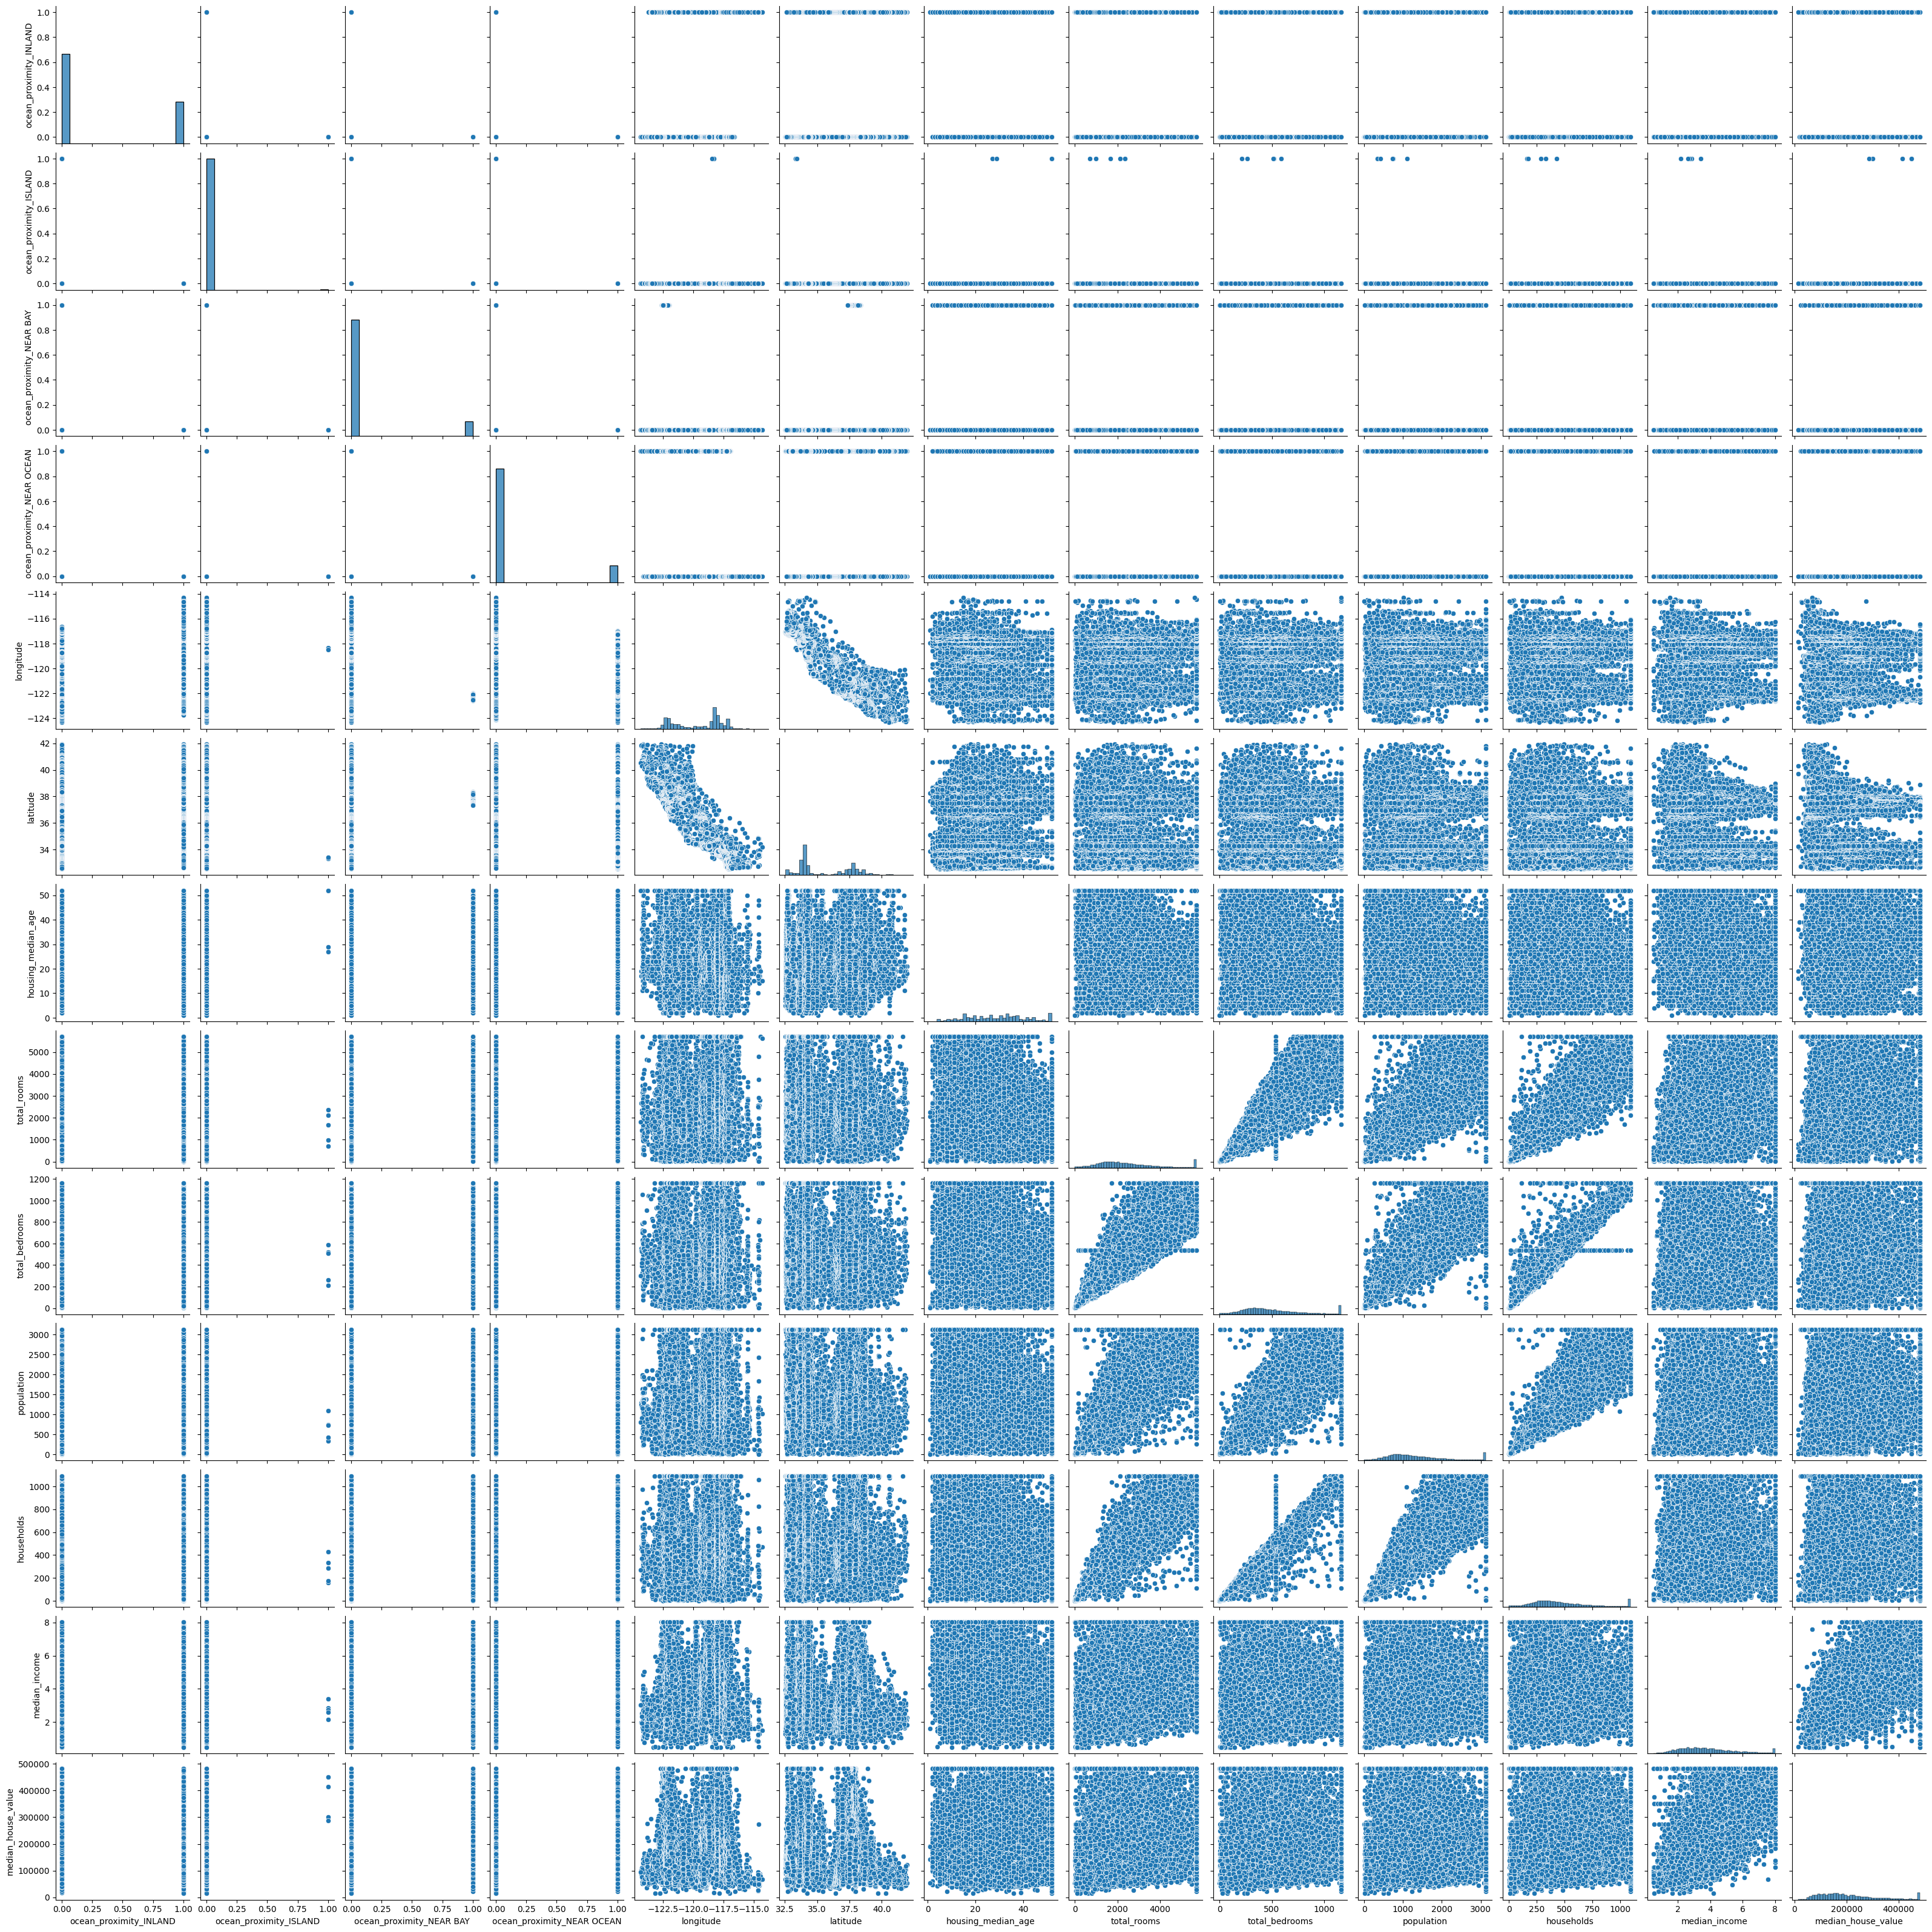

In [92]:
sns.pairplot(df)

**TRAIN-TEST SPLIT**

In [93]:
x=df.drop(columns=['median_house_value'])
y=df['median_house_value']

In [94]:
x

ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                         0.0                     0.0   
1                         0.0                     0.0   
2                         0.0                     0.0   
3                         0.0                     0.0   
4                         0.0                     0.0   
...                       ...                     ...   
20635                     1.0                     0.0   
20636                     1.0                     0.0   
20637                     1.0                     0.0   
20638                     1.0                     0.0   
20639                     1.0                     0.0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  longitude  \
0                           1.0                         0.0    -122.23   
1                           1.0                         0.0    -122.22   
2                           1.0                         0.0    -122.24   
3                           1.0                         0.0    -122.25   
4                           1.0                         0.0    -122.25   
...                         ...                         ...        ...   
20635                       0.0                         0.0    -121.09   
20636                       0.0                         0.0    -121.21   
20637                       0.0                         0.0    -121.22   
20638                       0.0                         0.0    -121.32   
20639                       0.0                         0.0    -121.24   

       latitude  housing_median_age  total_rooms  total_bedrooms  population  \
0         37.88                41.0      880.000           129.0       322.0   
1         37.86                21.0     5698.375          1106.0      2401.0   
2         37.85                52.0     1467.000           190.0       496.0   
3         37.85                52.0     1274.000           235.0       558.0   
4         37.85                52.0     1627.000           280.0       565.0   
...         ...                 ...          ...             ...         ...   
20635     39.48                25.0     1665.000           374.0       845.0   
20636     39.49                18.0      697.000           150.0       356.0   
20637     39.43                17.0     2254.000           485.0      1007.0   
20638     39.43                18.0     1860.000           409.0       741.0   
20639     39.37                16.0     2785.000           616.0      1387.0   

       households  median_income  
0           126.0       8.013025  
1          1092.5       8.013025  
2           177.0       7.257400  
3           219.0       5.643100  
4           259.0       3.846200  
...           ...            ...  
20635       330.0       1.560300  
20636       114.0       2.556800  
20637       433.0       1.700000  
20638       349.0       1.867200  
20639       530.0       2.388600  

[20640 rows x 12 columns]

In [95]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [96]:
from sklearn.model_selection import train_test_split


In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [98]:
x_train.shape

(16512, 12)

In [99]:
x_test.shape

(4128, 12)

**MODEL TRAINING**

In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
lr=LinearRegression()

In [102]:
x_train_transform=lr.fit(x_train,y_train)

In [103]:
x_train_transform

LinearRegression()

In [104]:
y_pred=lr.predict(x_test)

**MODEL EVALUATION**

In [105]:
from sklearn.metrics import r2_score

In [106]:
r2=r2_score(y_test,y_pred)*100

In [107]:
r2

63.10629778629817

**Random Forest Regressor**

In [108]:
from sklearn.ensemble import RandomForestRegressor

In [109]:
rfr=RandomForestRegressor()

In [110]:
x_train_transforms=rfr.fit(x_train,y_train)

In [111]:
x_train_transforms

RandomForestRegressor()

In [112]:
y_pred1=rfr.predict(x_test)

In [113]:
r21=r2_score(y_test,y_pred1)*100

In [114]:
r21

81.74338910424176

**XGBRegressor**

In [115]:
from xgboost import XGBRegressor 

In [116]:
xgb=XGBRegressor()

In [117]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [118]:
y_pred2=xgb.predict(x_test)

In [119]:
r22=r2_score(y_test,y_pred2)*100

In [120]:
r22

81.99436277702515